In [13]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D,Flatten,Dense,MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the dataset
df = pd.read_csv('/content/NFLX.csv')

# Parse the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the dataframe
df.set_index('Date', inplace=True)

#fill missing values
df.fillna(method='ffill', inplace=True)  # Forward fill for time-series data

# Display the first few rows of the dataframe
print(df.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900  


In [4]:
#Normalizing using MinMaxScalar
df.fillna(method='ffill', inplace=True)  # Forward fill for time-series data
scaler = MinMaxScaler(feature_range=(0, 1))
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[features])  # Scale the features

In [5]:
#Creating time windows
window_size = 5  # number of days to use to predict the next day's price
X = []
y = []
for i in range(window_size, len(df_scaled)):
    X.append(df_scaled[i-window_size:i])  # input sequence
    y.append(df_scaled[i, 3])  # we'll use 'Close' price as the label

In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.2, shuffle = False)

In [16]:
# Define the CNN model
model = Sequential()

# Adding a Conv1D layer with 64 filters, a kernel size of 2, and 'relu' activation
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a MaxPooling1D layer to downsample the input
model.add(MaxPool1D(pool_size=2))

# Adding a Flatten layer to flatten the output for the Dense layer
model.add(Flatten())

# Adding a Dense layer with 50 units and 'relu' activation
model.add(Dense(50, activation='relu'))

# Adding the output layer with 1 unit and no activation for a regression output
model.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss function for regression
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Summary of the model to understand the architecture
model.summary()

# Train the model using the training data
# For demonstration, we'll set epochs to a lower number like 10
# Normally, you would experiment with this value and potentially set it higher
history = model.fit(X_train, y_train, epochs=10, verbose=1)

# Output the history of training to see how the loss changed over epochs
history.history


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             704       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                6450      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7205 (28.14 KB)
Trainable params: 7205 (28.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

{'loss': [0.01662026345729828,
  0.001678882515989244,
  0.001233935821801424,
  0.001136411796323955,
  0.0010118746431544423,
  0.0009630705462768674,
  0.001002518110908568,
  0.0009030906949192286,
  0.0008554900414310396,
  0.0008747402462176979]}

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Test Loss: {test_loss}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")


7/7 [==============================] - 0s 4ms/step
Test Loss: 0.0016593507025390863
Mean Squared Error: 0.0016593510341521606
Root Mean Squared Error: 0.04073513267625577
Mean Absolute Error: 0.026845381774616494
R-Squared: 0.9299658873767919


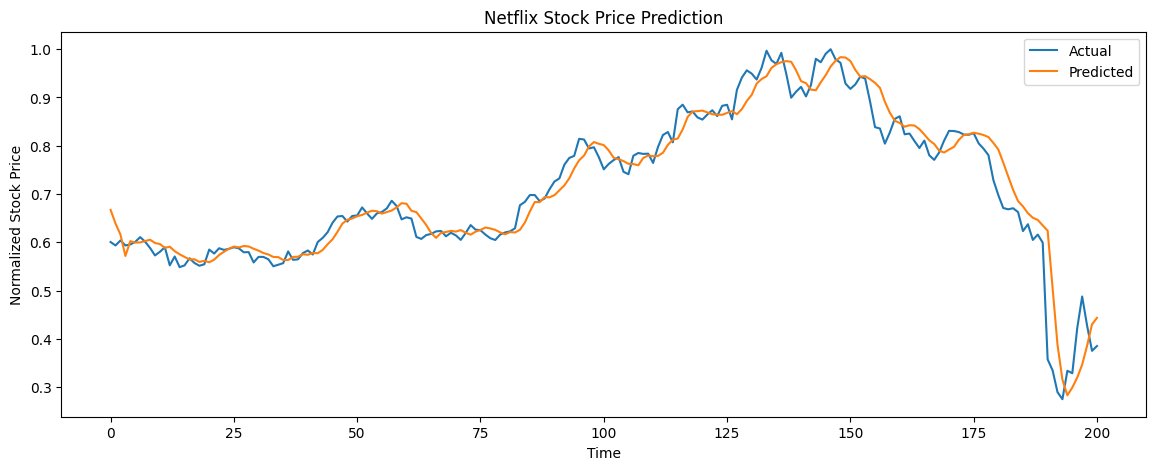

In [18]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined and scaled back to the original range if needed
# You might need to rescale them back if they were normalized

# Plot the actual values
plt.figure(figsize=(14,5))
plt.plot(y_test, label='Actual')

# Plot the predicted values
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Stock Price')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()
